<a href="https://colab.research.google.com/github/abhi-gm/Shapely-Values/blob/main/Explainable_AI_Shapely_Values_for_Pima_Indians_Diabetes_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Explainable AI - Shapely Values for Pima Indians Diabetes Database** 


## **1.Introduction**

Aim of notebook is to provide explanation for Random forest model used to model the Diabetes datsets using SHAP or Shapely values.

The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset

## **2.Importing Necessary Libraries**

In [ ]:
import pandas as pd
from pandas import DataFrame
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

## **`3.Reading Dataset`**

In [ ]:
url = "https://raw.githubusercontent.com/abhi-gm/Shapely-Values/main/diabetes.csv?token=ALKWD7CTCUKY2JJKFYOOJ6DBDFJ44"
data = pd.read_csv(url)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **4.Preprocessing the data**
### **4.1.Data Prep**

In [ ]:
feature = data.columns.tolist()
target = 'Outcome'
feature.remove(target)

X = data[ feature]

y = data[target]

## **4.2 Standardizes the data** 

Standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

In [ ]:
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(X))

### **4.3 Checking the Null values**

In [ ]:
#Checking wether there is any NAN values
data.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## **5.Train ,Validation and Test split**

Data is split into 3 parts

Taining data set = 80.75%

Validation data set = 14.25%

Test data set = 5%

In [ ]:
X = X

y = data[target]

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.05, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

## **6.Training Random Forest Regression model**

In [ ]:
model = RandomForestClassifier(verbose=1)
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=1, warm_start=False)

## **7. Predicting on test dataset**

In [ ]:
# Make predictions using the testing set
y_pred = model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


## **8.Checking model perfromance**

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7948717948717948


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


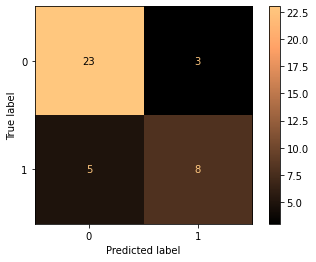

In [ ]:
#Confusion Matrix
plot_confusion_matrix(model, X_test, y_test,cmap='copper')  
plt.show()

## **9.SHAP for Explainability**

In [ ]:
import shap

In [ ]:
#Installing SHAP
!pip install shap

### **9.1. Intialize the Tree SHAP Explainer**

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

### **9.2.Force plot of Local explanability**

Visualize a single prediction

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][13,:], X_test.iloc[13,:])

The above example shows that there is 64% chance for person having  features to be diabetic 

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][38,:], X_test.iloc[38,:])

The above example shows that there is 64% chance for person having features to be **non** diabetic

### **9.3 Force Plot with Global Explanation**

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)

## **9.4. Decision Plots**

SHAP decision plots show how complex models arrive at their predictions (i.e., how models make decisions)

#### **Local Explainability**

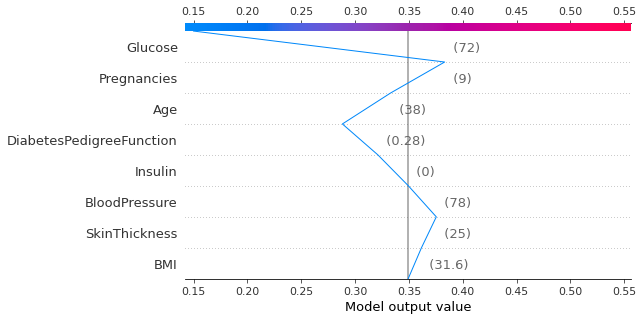

In [ ]:
expected_value = explainer.expected_value[1]
r = shap.decision_plot(expected_value, shap_values[1][38,:], X_test.iloc[38,:], return_objects=True)

#### **Global Explanability**

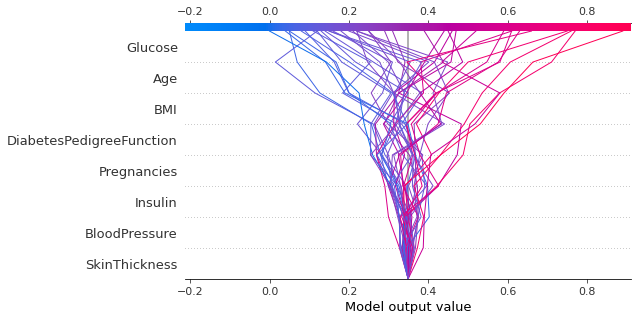

In [ ]:
expected_value = explainer.expected_value[1]
r = shap.decision_plot(expected_value, shap_values[1], X_test, return_objects=True)

### **9.5. SHAP Summary Plot-  Global explanation**

SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples

We can see Glucose be the most impacting feature which has a highest combined effect of the person being diabetic or not.

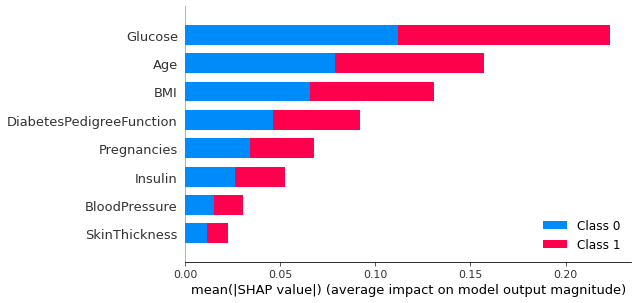

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

### **9.6.SHAP Dependence Plots**

It show the effect of a single feature across the whole dataset. 

This is similar to partial dependence plots(PDP), but account for the interaction effects present in the features, and are only defined in regions of the input space supported by data. 

The vertical dispersion of SHAP values at a single feature value is driven by interaction effects, and another feature is chosen for coloring to highlight possible interactions.

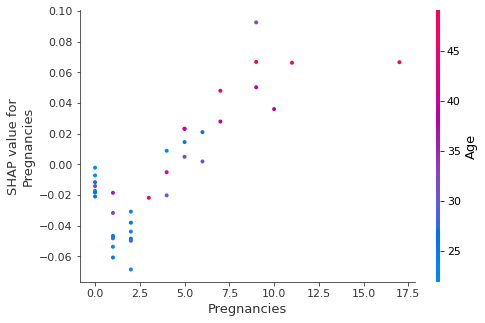

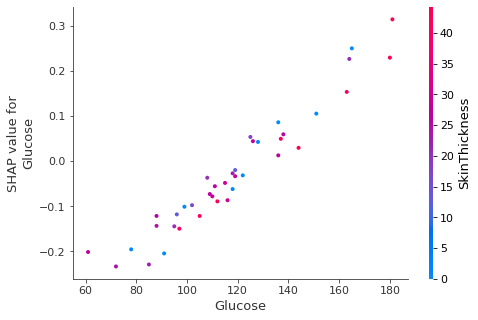

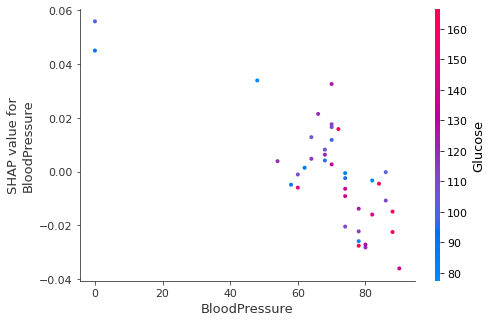

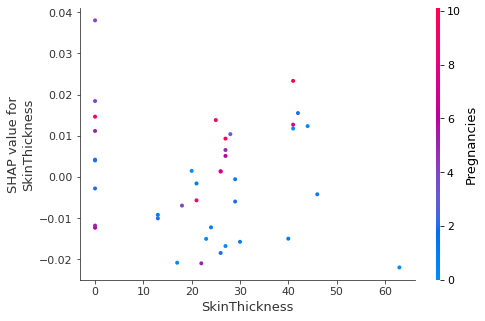

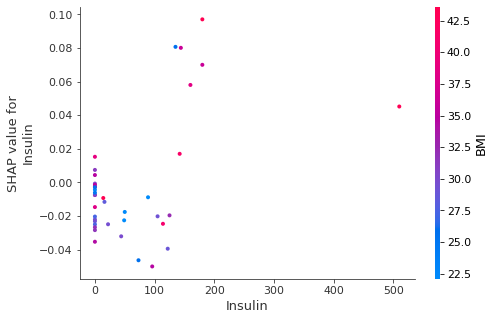

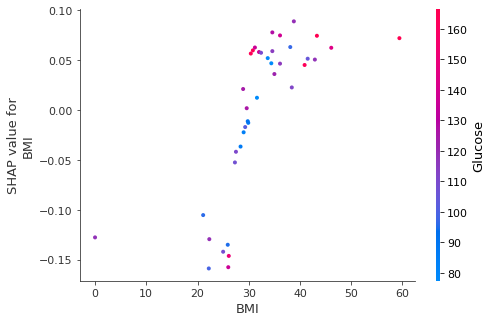

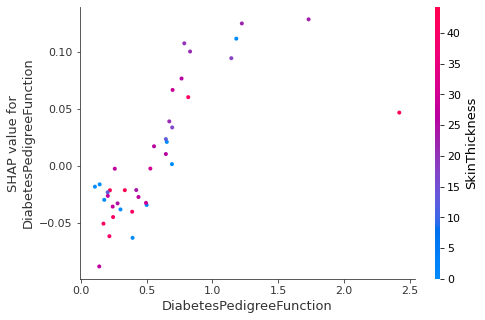

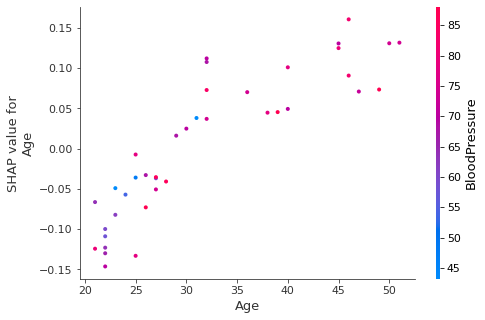

In [ ]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values[1], X_test, display_features=X_test)

## **10. Refrences**

* [A Unified Approach to Interpreting Model Predictions)](hhttps://arxiv.org/pdf/1705.07874.pdf)
* [SHAP](https://github.com/slundberg/shap)
* [Pima Indians Diabetes Databas](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
                                                                                

Copyright 2021 Abhishek Gargha Maheshwarappa

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.